### Теоретическая часть

{} - неупорядоченное множество.

() - упорядоченное множество.

{1, 2, 3} = {2, 1, 3} $\ne$ {1, 2, 3, 4}

(1, 2, 3) $\ne$ (2, 1, 3) $\ne$ (1, 2, 3, 4)

Граф G  — это упорядоченная пара G := (V, E) , где V — непустое множество вершин или узлов, а E — множество пар вершин, называемых рёбрами. Если вершины в ребрах упорядочены, такой граф называется ориентированным. Если вершины в ребрах неупорядочены, такой граф называется неориентированным. 

Вершины u и v называются концевыми вершинами (или просто концами) ребра e = {u, v}. Ребро, в свою очередь, соединяет эти вершины. Две концевые вершины одного и того же ребра называются соседними. Пара e = (u, v) называется ориентированным ребром или дугой. Тогда u назыввают началом дуги, а v - ее концом.


Если u, v — вершины, а e = (u, v)  — соединяющее их ребро, тогда вершина u и ребро e инцидентны, вершина v и ребро e тоже инцидентны. Две вершины (или два ребра) инцидентными быть не могут. Для обозначения ближайших вершин (рёбер) используется понятие смежности. Два ребра, инцидентные одной вершине, называются смежными; две вершины, инцидентные одному ребру, также называются смежными.

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Undirected.svg/188px-Undirected.svg.png'></center>

Вершины и рёбра графа называются также элементами графа, число вершин в графе |V| — порядком, число рёбер |E| — размером графа.

Два ребра называются смежными, если они имеют общую концевую вершину.

Два ребра называются кратными, если множества их концевых вершин совпадают.

Ребро называется петлёй, если его концы совпадают, то есть e = { v , v }.

Граф без петель и кратных рёбер называется простым.

Степенью deg  V вершины V называют количество инцидентных ей рёбер (при этом петли считают дважды). Для ориентированного графа также различают степени входящих и исходящих вершин.

Вершина называется изолированной, если она не является концом ни для одного ребра; листом, если она является концом ровно одного ребра.

Маршрутом в графе называют конечную последовательность вершин, в которой каждая вершина (кроме последней) соединена со следующей в последовательности вершиной ребром. Цепью называется маршрут без повторяющихся рёбер. Простой цепью называется маршрут без повторяющихся вершин (откуда следует, что в простой цепи нет повторяющихся рёбер).

Ориентированным маршрутом (или путём) в орграфе называют конечную последовательность вершин и дуг, в которой каждый элемент инцидентен предыдущему и последующему.

Циклом называют цепь, в которой первая и последняя вершины совпадают. При этом длиной пути (или цикла) называют число составляющих его рёбер. Заметим, что если вершины u и v являются концами некоторого ребра, то согласно данному определению, последовательность (u , v, u) является циклом. Чтобы избежать таких «вырожденных» случаев, вводят следующие понятия.

Путь (или цикл) называют простым, если рёбра в нём не повторяются; элементарным, если он простой и вершины в нём не повторяются. 

#### Представление графа в виде списка ребер

Пусть нас имеется некоторое небольшое сообщество, в котором мы можем оценить степень дружеских отношений в полуинтервале \(0; 1\]. Можно считать, что люди являются вершинами графа, а отношения между ними задаются дугами. Каждой дуге при этом можно сопоставить число, показывающее близость отношений, и получить взвешенный граф (граф, у которого дугам сопоставлены некоторые значения, совершенно не обязательно числовые).

Здесь мы считаем, что в списке хранятся только ненулевые значения. Мы могли бы хранить и нулевые значения, означающие отсутствие каких-либо дружеских отношений, но это приведет к тому, что ненулевые значения затеряются в большом списке нулевых.

Прочитаем ребра из файла и посмотрим на них.

In [1]:
raw_data = []
with open("data/out_sim_women.csv") as file:
    for item in file:
        # При чтении сразу делим строки на составные части.
        raw_data.append(item[:-1].split(";"))
        
# Выведем первые и последние пять ребер.
for line in raw_data[:5]:
    print(line)
for line in raw_data[-5:]:
    print(line)

['Eleanor', 'Brenda', '0.755928946018455']
['Eleanor', 'Dorothy', '0.353553390593274']
['Eleanor', 'Verne', '0.5']
['Eleanor', 'Laura', '0.755928946018455']
['Eleanor', 'Evelyn', '0.530330085889911']
['Charlotte', 'Nora', '0.176776695296637']
['Frances', 'Helen', '0.223606797749979']
['Frances', 'Nora', '0.176776695296637']
['Helen', 'Nora', '0.632455532033676']
['Nora', 'Eleanor', '0.35355339059327']


In [2]:
# Построим множества всех начальных и конечных вершин для нашего списка ребер.
# Объединение этих двух списков должно дать нам список всех вершин.
people1 = [d[0] for d in raw_data]
people2 = [d[1] for d in raw_data]
people = list(set(people1) | set(people2))

In [3]:
# Кто у нас тут дружит?
people

['Myrna',
 'Helen',
 'Flora',
 'Frances',
 'Ruth',
 'Dorothy',
 'Katherine',
 'Verne',
 'Charlotte',
 'Olivia',
 'Evelyn',
 'Pearl',
 'Sylvia',
 'Theresa',
 'Laura',
 'Eleanor',
 'Nora',
 'Brenda']

Проблемой такого представления является тот факт, что если в коллектив приходит новичок, то с ними еще никто не дружит, то есть у него нет ни одного ребра. Как следствие, мы не сможем восстановить его из списка ребер.

У этой проблемы есть несколько решений. Первое - хранить список вершин, а отдельно список ребер.

In [4]:
# Хорошей идеей будет оформить как функцию чтение людей из файла.
# Тогда ее можно будет вызывать из разных мест, а не копировать.
def getWomenGraph(filename):
    people = []
    data = []
    with open(filename) as file:
        cnt = int(file.readline()[:-1]) # Заодно удалим символ конца строки.
        for i in range(cnt):
            people.append(file.readline()[:-1])
        for item in file:
            data.append(item.split(";"))
    return people, cnt, data

In [5]:

people, people_cnt, raw_data = getWomenGraph("data/out_sim_women2.csv")
# Выведем прочитанный список людей.
print(people)
# Выведем первые и последние пять ребер.
for line in raw_data[:5]:
    print(line)
for line in raw_data[-5:]:
    print(line)

['Olivia', 'Pearl', 'Flora', 'Helen', 'Verne', 'Theresa', 'Dorothy', 'Nora', 'Eleanor', 'Ruth', 'Brenda', 'Katherine', 'Laura', 'Evelyn', 'Charlotte', 'Frances', 'Sylvia', 'Myrna']
['Eleanor', 'Brenda', '0.755928946018455\n']
['Eleanor', 'Dorothy', '0.353553390593274\n']
['Eleanor', 'Verne', '0.5\n']
['Eleanor', 'Laura', '0.755928946018455\n']
['Eleanor', 'Evelyn', '0.530330085889911\n']
['Charlotte', 'Nora', '0.176776695296637\n']
['Frances', 'Helen', '0.223606797749979\n']
['Frances', 'Nora', '0.176776695296637\n']
['Helen', 'Nora', '0.632455532033676\n']
['Nora', 'Eleanor', '0.353553390593274']


In [6]:
['Olivia', 'Pearl', 'Flora', 'Helen', 'Verne', 'Theresa', 'Dorothy', 'Nora', 'Eleanor', 'Ruth', 'Brenda', 'Katherine', 'Laura', 'Evelyn', 'Charlotte', 'Frances', 'Sylvia', 'Myrna']
[ [...], [...], ..., [(10, 0.76), (6, 0.35), (4, 0.5), ...] ]

[[Ellipsis], [Ellipsis], Ellipsis, [(10, 0.76), (6, 0.35), (4, 0.5), Ellipsis]]

Для работы с графами будем использовать библиотеку [NetworkX](https://networkx.github.io/).

Для рисования используем [MatPlotLib](https://matplotlib.org/).

[Здесь](https://habr.com/ru/post/468295/) и [python-graph-gallery.com/](здесь ) можно посмотреть как прекрасны могут быть графики, нарисованные с его помощью.

Замечу, что у меня (и некоторых уважаемых мною людей) до сих пор не получается рисовать на нем без помощи StackOverflow. Так что сколько бы вы ни учились, вам всегда будет что узнать про MatPlotLib. 

В качестве альтернативы могу предложить более модные [Seaborn](http://seaborn.pydata.org/), [Bokeh](https://docs.bokeh.org/en/latest/index.html) и массу других красивых библиотек.

In [7]:
#%matplotlib notebook
import matplotlib.pyplot as plt
#import pygraphviz
import networkx as nx

In [8]:
def buildGraph(data, thr = 0.):
    # Добавляем дуги в граф. Вершины добавятся из названий дуг.
    G1=nx.Graph()
    # Перебираем все найденные персоны.
    for p1, p2, w in data:
        # Собственно, добавляем дугу к графу. Вершины добавятся сами.
        if float(w) >= thr:
            G1.add_edge(p1, p2)
    return G1
    
def drawGraph(G):
    # Строим расположение вершин графа на плоскости.
    pstn=nx.spring_layout(G)
    #pstn=nx.kamada_kawai_layout(G)
    # Рисуем граф.
    _=nx.draw(G, pos=pstn, with_labels=True, node_color='r', edge_color='g')

def buildAndDrawGraph(data, thr = 0.):
    G1 = buildGraph(raw_data, thr)
    drawGraph(G1)
    return G1

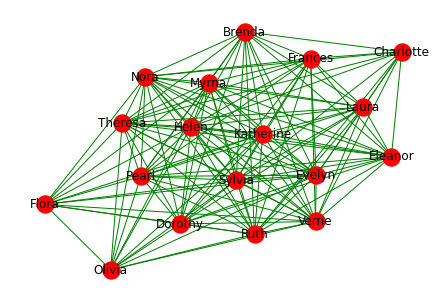

In [9]:
buildAndDrawGraph(raw_data)

На рисунке видно, что граф образует массу циклов. Лаура дружит с Дороти, Дороти дружит с Перл, Перл дружит с Лаурой - путь замкнулся. И подобных в графе много.

Но теперь попробуем постепенно повышать планку. Будем называть друзьями не тех, у кого уровень отношений выше нуля, а только тех, у кого он выше порогового значения.

Обратите внимание - на уровне 0.6 Оливия и Флора дружат только друг с другом, а с другими вершинами у них нет настолько сильных связей. Граф распадается на два не связанных подграфа, то есть становится **несвязным**. При уровне 0.8 мы получаем четыре отдельных **компоненты связности**.

In [10]:
from ipywidgets import interact, FloatSlider

In [11]:
def bgraph(threshold):
    buildAndDrawGraph(raw_data, threshold)

_=interact(bgraph,
           threshold=FloatSlider(min=0, max=1, value=0, step=0.1, description='Power of friendship:', readout_format='.1f'),
          )


interactive(children=(FloatSlider(value=0.0, description='Power of friendship:', max=1.0, readout_format='.1f'…

Еще одним вариантом хранения графа является матрица смежности. Матрица смежности графа G с конечным числом вершин $n$ (пронумерованных числами от 1 до $n$) — это квадратная матрица A размера $n$, в которой значение элемента $a_{ij}$ равно числу рёбер из вершины $i$ графа в вершину $j$. Вместо числа ребер в матрице могут храниться любые другие значения.

Построим матрицу смежности на тех же самых данных.

In [12]:
matr = [[0.0 for j in range(people_cnt)] for i in range(people_cnt)]

for item in raw_data:
    # По имени человека получчаем его номер в списке вершин (номер вершины).
    i1 = people.index(item[0])
    i2 = people.index(item[1])
    # Так как дружба - понятие симметричное, то и матрицу делаем симметричной.
    # Если А дружит с В, то и В дружит с А.
    matr[i1][i2] = float(item[2])
    matr[i2][i1] = float(item[2])

In [13]:
def printMatrix(m):
    for line in m:
        print(";".join([f'{e:3.1f}' for e in line]))
        

In [14]:
printMatrix(matr)

0.0;0.4;1.0;0.3;0.4;0.2;0.5;0.5;0.0;0.4;0.0;0.3;0.0;0.2;0.0;0.0;0.3;0.4
0.4;0.0;0.4;0.3;0.6;0.6;0.8;0.4;0.6;0.6;0.4;0.5;0.4;0.6;0.0;0.6;0.4;0.6
1.0;0.4;0.0;0.3;0.4;0.2;0.5;0.5;0.0;0.4;0.0;0.3;0.0;0.2;0.0;0.0;0.3;0.4
0.3;0.3;0.3;0.0;0.7;0.3;0.3;0.6;0.4;0.4;0.3;0.5;0.3;0.2;0.2;0.2;0.7;0.7
0.4;0.6;0.4;0.7;0.0;0.5;0.7;0.5;0.5;0.8;0.4;0.6;0.4;0.4;0.2;0.2;0.8;0.8
0.2;0.6;0.2;0.3;0.5;0.0;0.5;0.4;0.7;0.7;0.8;0.3;0.8;0.9;0.7;0.7;0.4;0.4
0.5;0.8;0.5;0.3;0.7;0.5;0.0;0.2;0.4;0.7;0.3;0.6;0.3;0.5;0.0;0.4;0.5;0.7
0.5;0.4;0.5;0.6;0.5;0.4;0.2;0.0;0.4;0.4;0.3;0.7;0.3;0.2;0.2;0.2;0.8;0.5
0.0;0.6;0.0;0.4;0.5;0.7;0.4;0.4;0.0;0.8;0.8;0.2;0.8;0.5;0.5;0.8;0.4;0.2
0.4;0.6;0.4;0.4;0.8;0.7;0.7;0.4;0.8;0.0;0.6;0.4;0.6;0.5;0.5;0.5;0.6;0.5
0.0;0.4;0.0;0.3;0.4;0.8;0.3;0.3;0.8;0.6;0.0;0.2;0.9;0.8;0.8;0.8;0.3;0.2
0.3;0.5;0.3;0.5;0.6;0.3;0.6;0.7;0.2;0.4;0.2;0.0;0.2;0.3;0.0;0.2;0.9;0.8
0.0;0.4;0.0;0.3;0.4;0.8;0.3;0.3;0.8;0.6;0.9;0.2;0.0;0.8;0.6;0.8;0.3;0.2
0.2;0.6;0.2;0.2;0.4;0.9;0.5;0.2;0.5;0.5;0.8;0.3;0.8;0.0;0.5;0.7;

Здесь девушки дружат практически все о всеми. Но теперь представим себе граф дорог, соединяющих города. Если два города непосредственно соеденены дорогой, в нем ставится расстояние по дороге, в противном случае - ноль.

Если взять страну масштаба России, то ненулевых значений в матрице будет не так много. Все-таки прямой дороги из Москвы нет ни в Санкт-Петербург (она идет через Тверь), ни в Новосибирск (надо ехать, например, через Владимир). Матрица будет содержать меньше 10% ненулевых элементов (зависит от числа населенных пунктов) и занимать непозволительно много места.

Чтобы сэкономить место надо хранить только ненулевые дуги. Но к списку дуг сложно иметь доступ, так как придется долго искать. Для ускорения будем использовать представление в виде словаря. Словарь первого уровня будет хранить начальные вершины ребер графа. В качестве ключа мы будем использовать название начальной вершины вершины. В качестве значений будет храниться еще один словарь, который будет хранить названия конечных вершин графа и значение, привязанное к данному ребру.

```
{'Olivia': {'Pearl' : 0.4,
            'Flora' : 1.0,
            'Helen' : 0.3, ...
           }, 
 'Pearl':  {'Olivia': 0.4,
            'Flora' : 0.4,
            'Helen' : 0.3, ...
           }, 
 ...
}

```

Таким образом, если нам необходимо узнать насколько дружат две выбранные девушки, мы по имени первой получим словарь всех ее связей, а по имени второй - хранимое значение уровня дружбы (или 0 по умолчанию). Фактически, для каждого человека мы храним список всех людей, которых он дружит, причем к человеку привязывается их уровень дружбы. Всех людей много, всех нельзя знать, поэтому, если один человек не знает второго, то он с ним и не дружит. То есть можно вернуть нулевой уровень дружбы.

In [15]:
from collections import defaultdict

In [16]:
people, people_cnt, raw_data = getWomenGraph("data/out_sim_women2.csv")

people_dict = defaultdict(lambda: None)

for woman in people:
    people_dict[woman] = defaultdict(int)
    
for friends in raw_data:
    people_dict[friends[0]][friends[1]] = float(friends[2])

In [17]:
people_dict

defaultdict(<function __main__.<lambda>()>,
            {'Olivia': defaultdict(int,
                         {'Evelyn': 0.25,
                          'Pearl': 0.408248290463863,
                          'Ruth': 0.353553390593274,
                          'Sylvia': 0.267261241912424,
                          'Katherine': 0.288675134594813,
                          'Myrna': 0.353553390593274,
                          'Theresa': 0.25,
                          'Helen': 0.316227766016838,
                          'Nora': 0.5}),
             'Pearl': defaultdict(int,
                         {'Ruth': 0.577350269189626,
                          'Sylvia': 0.436435780471985,
                          'Katherine': 0.471404520791032,
                          'Myrna': 0.577350269189626,
                          'Theresa': 0.612372435695794,
                          'Frances': 0.577350269189626,
                          'Helen': 0.258198889747161,
                          'Nora': 0.4

In [18]:
# Рут дружит с Сильвией, но не дружит с Дороти.
people_dict['Ruth']['Sylvia'], people_dict['Ruth']['Dorothy']

(0.566946709513841, 0)

Мы могли бы и дальше излагать варианты хранения графа, но нам мешает отсутствие представлений об объектно-ориентированном программировании и некоторая сложность отображения некоторых решений.

Так, например, мы можем хранить не просто значение уровня дружбы, а пару, первое значение которой хранит уровень дружбы, а второе - словарь конкретного человека. В таком случае, если нам надо пройти путь между двумя людьми, то мы можем написать нужное количество имен идущих подряд. Но, с другой стороны, Рут дружит с Оливией, Оливия дружит с Рут. Если мы будем отображать такой словарь методами по умолчанию, то он начнет бесконечно отрисовывать девушек, что приведет к неприятным последствиям. В графе имеются циклы, по которым мы будем ходить пока у нас не кончится память. Поэтому представим себе такую реализацию, но программировать не будем (хотя она по-своему хороша).

### Деревья

Под деревом понимается следующий граф:
- связаный без циклов;
- количество ребер на одно меньше числа вершин.
На самом деле эти определения идентичны.

В ориентированном дереве одна вершина имеет степень входящих вершин равную 0 (она называется корнем дерева), все остальные имеют степень входящих вершин равную 1. Начальная вершина ребра называется родительской (родителем), конечная - дочерней (потомком). Вершины, из которых не исходит ни одной дуги называются листьями.

В качестве примера дерева можно привести дерево зависимостей, полученное в результате синтаксического анализа. Возьмем запись дерева в формате CONLLU из [Universal Dependencies](https://universaldependencies.org/).

```
1	Алгоритм	алгоритм	NOUN	_	Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing	12	nsubj	12:nsubj	SpaceAfter=No
2	,	,	PUNCT	_	_	4	punct	4:punct	_
3	от	от	ADP	_	_	4	case	4:case	_
4	имени	имя	NOUN	_	Animacy=Inan|Case=Gen|Gender=Neut|Number=Sing	1	conj	1:conj	_
5	учёного	ученый	NOUN	_	Animacy=Anim|Case=Gen|Gender=Masc|Number=Sing	4	nmod	4:nmod	_
6	аль	аль	PART	_	_	5	appos	5:appos	SpaceAfter=No
7	-	-	PUNCT	_	_	8	punct	8:punct	SpaceAfter=No
8	Хорезми	Хорезми	PROPN	_	Animacy=Anim|Case=Gen|Gender=Masc|Number=Sing	6	flat:name	6:flat:name	SpaceAfter=No
9	,	,	PUNCT	_	_	8	punct	8:punct	_
10	-	-	PUNCT	_	_	1	punct	1:punct	_
11	точный	точный	ADJ	_	Case=Nom|Degree=Pos|Gender=Masc|Number=Sing	12	amod	12:amod	_
12	набор	набор	NOUN	_	Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing	0	root	0:root	_
13	инструкций	инструкция	NOUN	_	Animacy=Inan|Case=Gen|Gender=Fem|Number=Plur	12	nmod	12:nmod	SpaceAfter=No
14	,	,	PUNCT	_	_	15	punct	15:punct	_
15	описывающих	описывать	VERB	_	Aspect=Imp|Case=Gen|Number=Plur|Tense=Pres|VerbForm=Part|Voice=Act	13	acl	13:acl	_
16	порядок	порядок	NOUN	_	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	15	obj	15:obj	_
17	действий	действие	NOUN	_	Animacy=Inan|Case=Gen|Gender=Neut|Number=Plur	16	nmod	16:nmod	_
18	исполнителя	исполнитель	NOUN	_	Animacy=Anim|Case=Gen|Gender=Masc|Number=Sing	17	nmod	17:nmod	_
19	для	для	ADP	_	_	20	case	20:case	_
20	достижения	достижение	NOUN	_	Animacy=Inan|Case=Gen|Gender=Neut|Number=Sing	16	nmod	16:nmod	_
21	результата	результат	NOUN	_	Animacy=Inan|Case=Gen|Gender=Masc|Number=Sing	20	nmod	20:nmod	_
22	решения	решение	NOUN	_	Animacy=Inan|Case=Gen|Gender=Neut|Number=Sing	21	nmod	21:nmod	_
23	задачи	задача	NOUN	_	Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing	22	nmod	22:nmod	_
24	за	за	ADP	_	_	26	case	26:case	_
25	конечное	конечный	ADJ	_	Case=Acc|Degree=Pos|Gender=Neut|Number=Sing	26	amod	26:amod	_
26	время	время	NOUN	_	Animacy=Inan|Case=Acc|Gender=Neut|Number=Sing	20	nmod	20:nmod	SpaceAfter=No
27	.	.	PUNCT	_	_	12	punct	12:punct	_
```

Здесь у каждой вершины есть свой идентификатор, токен, лемма, часть речи, идентификатор родительской вершины, набор грамматических параметров, роль слова в предложении, прочая информация. Нумерация вершин начинается с 1. Помимо этого нефвно добавлена вершина с номеро 0, которая будет формальным корнем дерева (даже в том случае, если предложение представлено несколькими несязными фрагментами). Попробуем построить дерево такого предложения.

Для каждой вершины мы будем хранить кортеж с информацией о вершине и списком дочерних вершин. Так как в дереве нет циклов, то подобный подход не вызывает никаких проблем.

In [19]:
def loadDependencyTree(filename):
    with open(filename) as file:
        lines = file.read().split('\n')
    words = [l.split('\t') for l in lines[:-1]]
    
    tokens = [w[0]+'. '+w[2] for w in words]
    nodes = [('0. root', [])] # Нулевая вершина всегда корень.
    nodes.extend([(t, []) for t in tokens])
    root_no = -1
    
    for i, word in enumerate(words):
        # Родителю добавляем потомка.
        nodes[int(word[6])][1].append(nodes[i+1])
    
    return nodes

In [20]:
tree = loadDependencyTree('data/sent.txt')
tree[0]

('0. root',
 [('12. набор',
   [('1. алгоритм',
     [('4. имя',
       [('2. ,', []),
        ('3. от', []),
        ('5. ученый',
         [('6. аль', [('8. Хорезми', [('7. -', []), ('9. ,', [])])])])]),
      ('10. -', [])]),
    ('11. точный', []),
    ('13. инструкция',
     [('15. описывать',
       [('14. ,', []),
        ('16. порядок',
         [('17. действие', [('18. исполнитель', [])]),
          ('20. достижение',
           [('19. для', []),
            ('21. результат', [('22. решение', [('23. задача', [])])]),
            ('26. время', [('24. за', []), ('25. конечный', [])])])])])]),
    ('27. .', [])])])

Выведем дерево используя отступы при переходе с уровня на уровень.

In [21]:
def printTree(node, shift = 0):
    print(' '*shift, node[0])
    for child in node[1]:
        printTree(child, shift +2)

In [22]:
printTree(tree[0])

 0. root
   12. набор
     1. алгоритм
       4. имя
         2. ,
         3. от
         5. ученый
           6. аль
             8. Хорезми
               7. -
               9. ,
       10. -
     11. точный
     13. инструкция
       15. описывать
         14. ,
         16. порядок
           17. действие
             18. исполнитель
           20. достижение
             19. для
             21. результат
               22. решение
                 23. задача
             26. время
               24. за
               25. конечный
     27. .


Выведем предложение по дереву по следующему алгоритму. 
1. Выводим всех потомков с номерами меньше нашего.
2. Выводим себя.
3. Выводим всех потомков с номерами больше нашего.

In [25]:
def printSent2(node):
    my_no = int(node[0].split('.')[0])
    res = []
    for child in node[1]:
        if my_no > int(child[0].split('.')[0]):
            res.append(printSent2(child))
    if my_no != 0:
        res.append(node[0].split('.')[1])
    for child in node[1]:
        if my_no < int(child[0].split('.')[0]):
            res.append(printSent2(child))
    return ' '.join(res)

In [26]:
printSent2(tree[0])

' алгоритм  ,  от  имя  ученый  аль  -  Хорезми  ,  -  точный  набор  инструкция  ,  описывать  порядок  действие  исполнитель  для  достижение  результат  решение  задача  за  конечный  время  '

А теперь выведем дерево по иному алгоритму.
1. Выводим себя, открываем скобку, если есть потомки.
2. Выводим всех потомков через запятую.
3. Закрываем скобку, если есть потомки.

Такая запись называется **прямой польской записью**. Она позволяетп по строке восстановить дерево.

In [27]:
def printSent3(node):
    if len(node[1]) != 0:
        res = []
        for child in node[1]:
            res.append(printSent3(child))
        res = node[0].split('.')[1] + ' [' + ';'.join(res) + ']'
    else:
        res = node[0].split('.')[1]
    return res

In [28]:
printSent3(tree[0])

' root [ набор [ алгоритм [ имя [ ,; от; ученый [ аль [ Хорезми [ -; ,]]]]; -]; точный; инструкция [ описывать [ ,; порядок [ действие [ исполнитель]; достижение [ для; результат [ решение [ задача]]; время [ за; конечный]]]]]; ]]'

В обратной польской записи сперва выводятся потомки, а потом сама вершина.

In [29]:
def printSent4(node):
    if len(node[1]) != 0:
        res = []
        for child in node[1]:
            res.append(printSent4(child))
        res = '[ ' + ';'.join(res) + ' ]' + node[0].split('.')[1]
    else:
        res = node[0].split('.')[1]
    return res

In [30]:
printSent4(tree[0])

'[ [ [ [  ,; от;[ [ [  -; , ] Хорезми ] аль ] ученый ] имя; - ] алгоритм; точный;[ [  ,;[ [  исполнитель ] действие;[  для;[ [  задача ] решение ] результат;[  за; конечный ] время ] достижение ] порядок ] описывать ] инструкция;  ] набор ] root'

Подобная запись удобна в случае если мы записываем арифметические выражения. Тогда проще сперва записать над какими операндами совершается действие, а потом саму операцию.

Обе записи позволяют легко сохранить дерево в линейный формат (например, для записи в файл).

In [31]:
eq = ('.* ', [('.+ ', [('.3', []), ('.2', [])]), ('.6',[])])
printSent4(eq)

'[ [ 3;2 ]+ ;6 ]* '